### MATA KULIAH PEMBELAJARAN MESIN (CASE BASED 1)


Nama : Aisyah Dliya Ramadhanti

NIM : 1301201154

Kelas : IF4406

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
!gdown --id 1yFhBLvup-SMvCe1EWdPoksUm4b4WmyQZ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yFhBLvup-SMvCe1EWdPoksUm4b4WmyQZ
To: /content/arrhythmia_csv.csv
100% 413k/413k [00:00<00:00, 89.6MB/s]


In [ ]:
data =  pd.read_csv('arrhythmia_csv.csv', sep = ",")
data

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(125), int64(155)
memory usage: 988.9 KB


Cek Missing Value pada Data Sesungguhnya

In [ ]:
data.isnull().sum().sum()

408

Memilih Sample Data

In [ ]:
data.drop(data.columns[8:-3],axis=1, inplace=True)
data.shape

(452, 11)

Menampilkan deskriptif statistik data

In [ ]:
data.describe()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,chV6_QRSA,chV6_QRSTA,class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,88.800000,115.900000,16.000000


Visualisasi Data

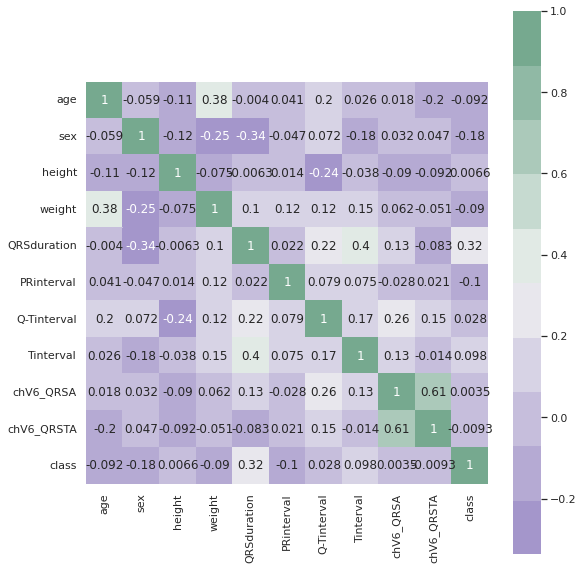

In [ ]:
map = sns.diverging_palette(275,150,  s=45, l=65, n=10)
corr = data.corr()
plt.subplots(figsize=(9,10))
sns.heatmap(corr,cmap= map,annot=True, square=True);

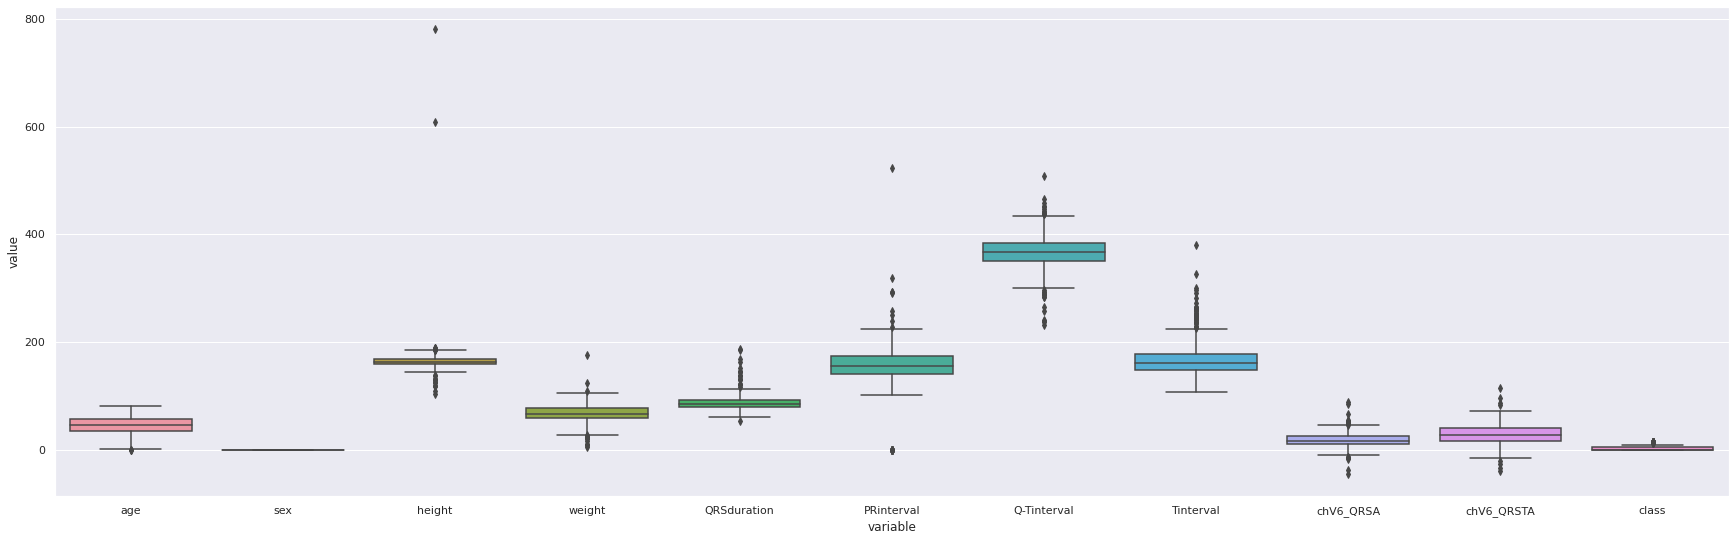

In [ ]:
#boxplot sebelum normalisasi

def boxplot(data):
    sns.set(rc={'figure.figsize':(30,9)})
    sns.boxplot(x="variable", y="value", data=pd.melt(data[data.columns]))

    plt.show()

boxplot(data)

Cek Missing Value

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
#melihat persen missing value dari setiap kolom data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
age,0,0.0
sex,0,0.0
height,0,0.0
weight,0,0.0
QRSduration,0,0.0
PRinterval,0,0.0
Q-Tinterval,0,0.0
Tinterval,0,0.0
chV6_QRSA,0,0.0
chV6_QRSTA,0,0.0


Cek Inkonsistensi Data

In [ ]:
#melihat jumlah data yang duplikat
data.duplicated().sum()

0

In [ ]:
data

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,23.3,49.4,8
1,56,1,165,64,81,174,401,149,20.4,38.8,6
2,54,0,172,95,138,163,386,185,12.3,49.0,10
3,55,0,175,94,100,202,380,179,34.6,61.6,1
4,75,0,190,80,88,181,360,177,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,38.0,62.4,10
449,36,0,166,68,108,176,365,194,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,25.0,46.6,1


### DATA PRE-PROCESSING

In [ ]:
data_train = data.copy()

#memisahkan data x dengan target (data y)
data_train.drop(data_train.columns[-1], axis = 1, inplace = True)

#menentukan target
y_target = data['class']

In [ ]:
#NORMALISASI DATA
data_train = StandardScaler().fit_transform(data_train)
data_train

array([[ 1.73443926, -1.1075202 ,  0.64132669, ...,  0.11380926,
         0.29460309,  1.07867028],
       [ 0.57931213,  0.90291807, -0.03199781, ..., -0.58856355,
         0.0796127 ,  0.50487408],
       [ 0.4577198 , -1.1075202 ,  0.15653305, ...,  0.4228533 ,
        -0.52087767,  1.0570176 ],
       ...,
       [-0.63661117, -1.1075202 , -0.00506483, ...,  0.67570751,
        -4.7094834 , -3.3926096 ],
       [-0.87979583,  0.90291807, -0.30132761, ...,  1.34998541,
         0.42063193,  0.92710147],
       [ 1.91682776,  0.90291807, -0.16666271, ..., -0.89760759,
         0.14633386,  0.18008377]])

### PEMBANGUNAN MODEL

Split Data

In [ ]:
x = data_train
y = y_target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

Membangun Model

In [ ]:
ann = keras.Sequential([
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(32, activation = "sigmoid"),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(64, activation = "sigmoid")
])

In [ ]:
#compiling the model

ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), loss = "sparse_categorical_crossentropy" ,metrics=['accuracy'])
train_data = ann.fit(x_train, y_train, batch_size= 32, epochs = 60)

Epoch 1/60
12/12 [==============================] - 1s 3ms/step - loss: 2.2528 - accuracy: 0.5042
Epoch 2/60
12/12 [==============================] - 0s 3ms/step - loss: 1.7665 - accuracy: 0.5568
Epoch 3/60
12/12 [==============================] - 0s 3ms/step - loss: 1.6218 - accuracy: 0.5568
Epoch 4/60
12/12 [==============================] - 0s 3ms/step - loss: 1.5343 - accuracy: 0.5568
Epoch 5/60
12/12 [==============================] - 0s 3ms/step - loss: 1.4997 - accuracy: 0.5845
Epoch 6/60
12/12 [==============================] - 0s 3ms/step - loss: 1.4631 - accuracy: 0.5651
Epoch 7/60
12/12 [==============================] - 0s 3ms/step - loss: 1.4527 - accuracy: 0.5845
Epoch 8/60
12/12 [==============================] - 0s 4ms/step - loss: 1.4199 - accuracy: 0.5845
Epoch 9/60
12/12 [==============================] - 0s 3ms/step - loss: 1.3772 - accuracy: 0.5845
Epoch 10/60
12/12 [==============================] - 0s 3ms/step - loss: 1.3615 - accuracy: 0.5873
Epoch 11/60
12/12 [

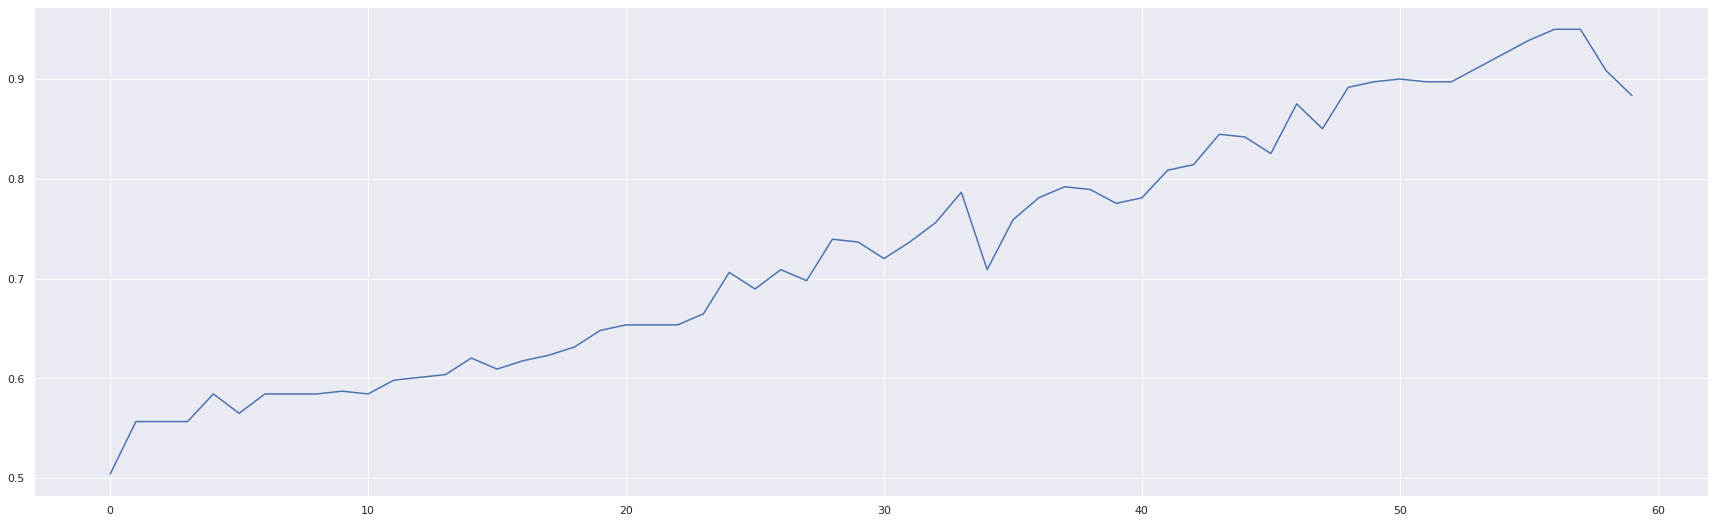

In [ ]:
plt.plot(train_data.history['accuracy'], linestyle = 'solid')
plt.show()

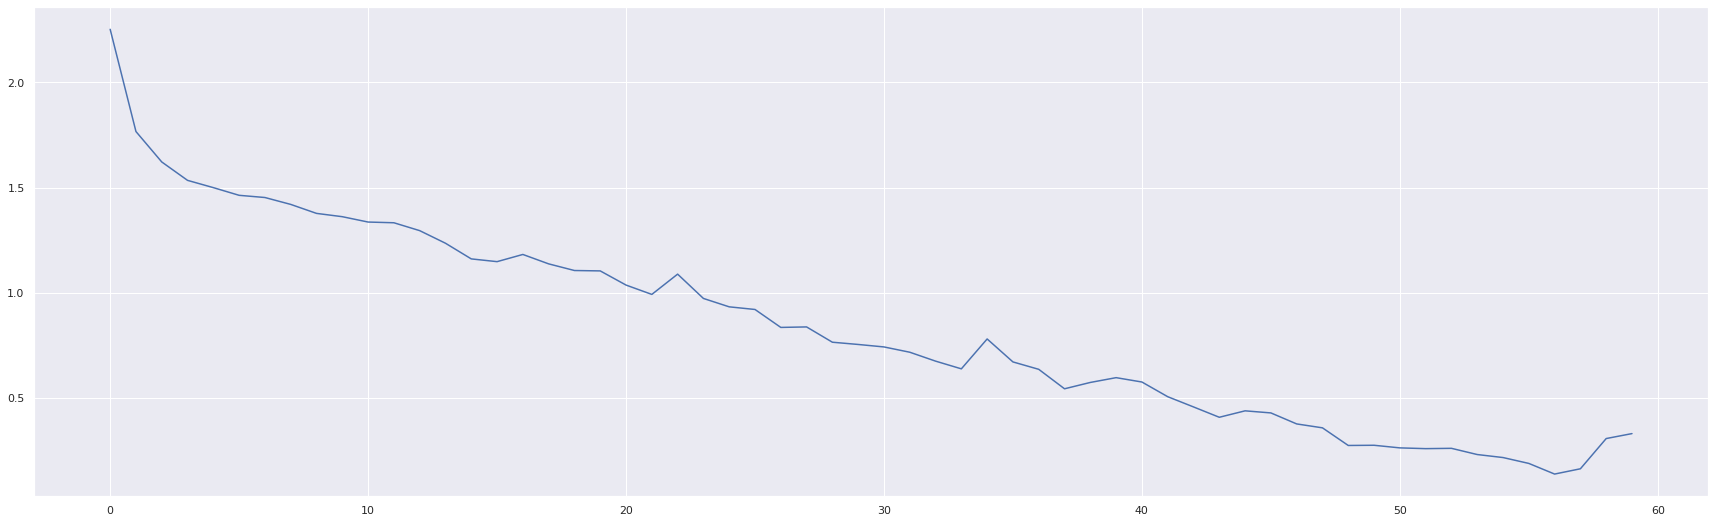

In [ ]:
plt.plot(train_data.history['loss'], linestyle = 'solid')
plt.show()

In [ ]:
print("Melakukan test pada model")
results = ann.evaluate(x_test, y_test, batch_size=256)
print("test loss, test acc:", results)

Melakukan test pada model
1/1 [==============================] - 0s 179ms/step - loss: 3.1920 - accuracy: 0.5714
test loss, test acc: [3.192021608352661, 0.5714285969734192]
